https://www.kaggle.com/code/brsdincer/forest-fire-detection-prediction-all-process

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("behroozsohrabi/us-wildfire-records-6th-edition")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/us-wildfire-records-6th-edition


In [ ]:
import os # Import the 'os' module to access its functions

# List files in the dataset directory
files = os.listdir(path)
print("Files and folders in dataset:", files)

Files and folders in dataset: ['_variable_descriptions.csv', 'data.sqlite', 'data.csv']


In [ ]:
import pandas as pd
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("behroozsohrabi/us-wildfire-records-6th-edition")

# Construct the correct data path
data_path = os.path.join(path, 'data.csv')  # Assuming 'data.csv' is in the main dataset folder

# Load the dataset
wildfire = pd.read_csv(data_path)

# Check the first few rows
print(wildfire.head())

# Get basic info about the dataset
print(wildfire.info())

# Check for any missing values
print(wildfire.isnull().sum())

<ipython-input-4-fbe7bee78f6e>:12: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,26,27,36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  wildfire = pd.read_csv(data_path)


   OBJECTID                                              Shape  FOD_ID  \
0         1  b'\x00\x01\xad\x10\x00\x00\xc8\xce\n[_@^\xc0\x...       1   
1         2  b'\x00\x01\xad\x10\x00\x00\xc8\xe594\xe2\x19^\...       2   
2         3  b'\x00\x01\xad\x10\x00\x00x{\xac \x13/^\xc0@\x...       3   
3         4  b'\x00\x01\xad\x10\x00\x00\xc8\x13u\xd7s\xfa]\...       4   
4         5  b'\x00\x01\xad\x10\x00\x00\xd0\x11y\xf8\xb6\xf...       5   

       FPA_ID SOURCE_SYSTEM_TYPE SOURCE_SYSTEM NWCG_REPORTING_AGENCY  \
0  FS-1418826                FED   FS-FIRESTAT                    FS   
1  FS-1418827                FED   FS-FIRESTAT                    FS   
2  FS-1418835                FED   FS-FIRESTAT                    FS   
3  FS-1418845                FED   FS-FIRESTAT                    FS   
4  FS-1418847                FED   FS-FIRESTAT                    FS   

  NWCG_REPORTING_UNIT_ID  NWCG_REPORTING_UNIT_NAME SOURCE_REPORTING_UNIT  ...  \
0                USCAPNF    Plumas Nation

In [ ]:
wildfire.head()

,OBJECTID,Shape,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,...,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,1,b'\x00\x01\xad\x10\x00\x00\xc8\xce\n[_@^\xc0\x...,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,...,1730.0,0.10,A,40.036944,-121.005833,USFS,CA,63.0,6063.0,Plumas County
1,2,b'\x00\x01\xad\x10\x00\x00\xc8\xe594\xe2\x19^\...,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,1530.0,0.25,A,38.933056,-120.404444,USFS,CA,61.0,6061.0,Placer County
2,3,b'\x00\x01\xad\x10\x00\x00x{\xac \x13/^\xc0@\x...,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,2024.0,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA,17.0,6017.0,El Dorado County
3,4,b'\x00\x01\xad\x10\x00\x00\xc8\x13u\xd7s\xfa]\...,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,1400.0,0.10,A,38.559167,-119.913333,USFS,CA,3.0,6003.0,Alpine County
4,5,b'\x00\x01\xad\x10\x00\x00\xd0\x11y\xf8\xb6\xf...,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,1200.0,0.10,A,38.559167,-119.933056,USFS,CA,3.0,6003.0,Alpine County


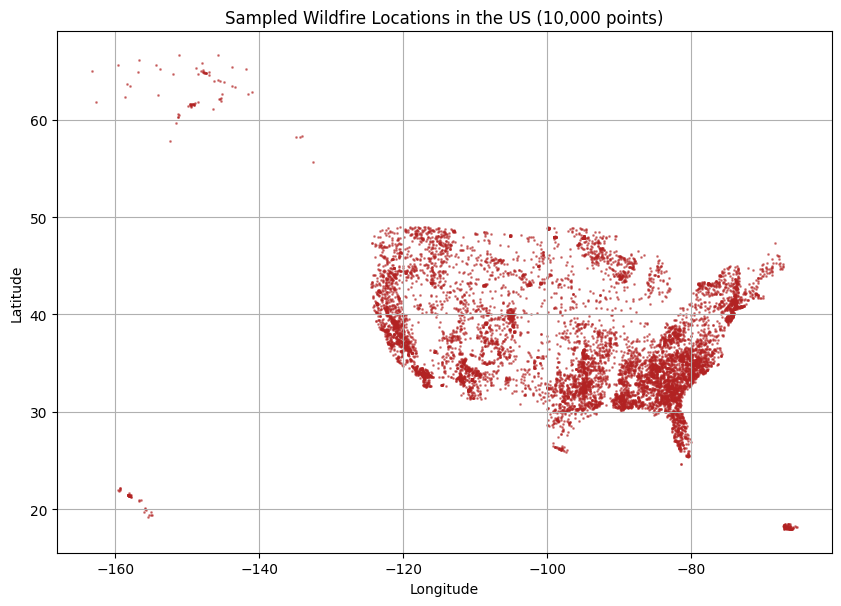

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Use a small sample (e.g. 10,000 rows) for faster plotting
sampled_wildfire = wildfire.sample(n=10000, random_state=42)

# Drop rows with missing lat/lon
sampled_wildfire = sampled_wildfire.dropna(subset=['LATITUDE', 'LONGITUDE'])

# Convert to GeoDataFrame
geometry = [Point(xy) for xy in zip(sampled_wildfire['LONGITUDE'], sampled_wildfire['LATITUDE'])]
gdf_fire = gpd.GeoDataFrame(sampled_wildfire, geometry=geometry)

# Set coordinate reference system
gdf_fire.set_crs(epsg=4326, inplace=True)

# Plot wildfires
gdf_fire.plot(markersize=1, alpha=0.5, figsize=(10, 8), color='firebrick')
plt.title("Sampled Wildfire Locations in the US (10,000 points)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Drop rows with missing FIRE_SIZE_CLASS or key features
fire_clean = wildfire[['FIRE_YEAR', 'DISCOVERY_DOY', 'DISCOVERY_TIME',
                       'LATITUDE', 'LONGITUDE', 'FIRE_SIZE_CLASS', 'STATE']].dropna()

# Encode categorical variable
le = LabelEncoder()
fire_clean['STATE'] = le.fit_transform(fire_clean['STATE'])
fire_clean['FIRE_SIZE_CLASS'] = le.fit_transform(fire_clean['FIRE_SIZE_CLASS'])  # A, B, C... -> 0, 1, 2...

# Features and target
X = fire_clean.drop('FIRE_SIZE_CLASS', axis=1)
y = fire_clean['FIRE_SIZE_CLASS']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluation
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6530811007114676
              precision    recall  f1-score   support

           0       0.70      0.77      0.74    130064
           1       0.63      0.70      0.66    132107
           2       0.41      0.16      0.23     31105
           3       0.19      0.03      0.05      4611
           4       0.19      0.03      0.05      2623
           5       0.14      0.03      0.04      1543
           6       0.30      0.08      0.13       842

    accuracy                           0.65    302895
   macro avg       0.37      0.26      0.27    302895
weighted avg       0.63      0.65      0.63    302895



In [ ]:

from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

file_path = "/content/drive/MyDrive/forestfires.csv"
wildfire_df = pd.read_csv(file_path)
print(wildfire_df.head())
wildfire_df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   IS

X	X-axis spatial coordinate within the forest grid (e.g., 1 to 9)
Y	Y-axis spatial coordinate within the forest grid (e.g., 1 to 9)
month	Month of the year (e.g., "mar", "oct")
day	Day of the week (e.g., "fri", "tue")


FFMC	Fine Fuel Moisture Code (from the Canadian Forest Fire Weather Index System) – indicates moisture content in surface litter and fine fuels



DMC	Duff Moisture Code – moisture content of loosely compacted organic layers of moderate depth


DC	Drought Code – moisture content in deep, compact organic layers (drought indicator)



ISI	Initial Spread Index – rate of fire spread based on wind and FFMC
temp	Temperature in Celsius




RH	Relative Humidity (%)



wind	Wind speed in km/h


rain	Rainfall in mm


area	Burned area of the forest (in hectares), i.e., the fire size

the scatter plot visualizes the relationship between wind speed (wind) and fire size (area)

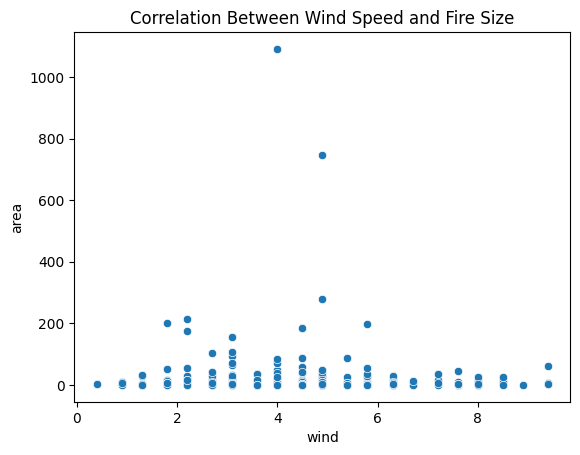

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.scatterplot(data=wildfire_df, x='wind', y='area')
plt.title("Correlation Between Wind Speed and Fire Size")
plt.show()


Observations:
Most of the fire sizes (area) are clustered near zero, regardless of wind speed.

There are a few outliers (e.g., fire sizes exceeding 200, 600, even 1000 hectares) around wind speeds of 2 to 5 km/h.

Wind speeds range roughly between 1 and 9 km/h.

Interpretation:
No strong linear correlation is visually apparent. While higher wind speeds might contribute to faster spread, the actual fire size seems mostly unaffected by wind speed alone.

A few large fires occurred at moderate wind speeds (around 4 km/h)

In [ ]:
# Calculate Pearson correlation between wind and area (fire size in ha)
correlation = wildfire_df[['wind', 'area']].corr(method='pearson')
print(correlation)



          wind      area
wind  1.000000  0.012317
area  0.012317  1.000000


Correlation coefficient = 0.012: This means there’s almost no linear correlation between wind speed and fire size.

wind speed alone doesn't strongly influence fire size. That doesn’t mean wind isn’t a factor—just that:

It might interact with other variables (like temperature, humidity, fuel type),

Or its effect may be non-linear or context-dependent.

 Multiple Regression on Wildfire Size

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm


# Log-transform the area to handle skew (log(1 + area) handles 0s)
wildfire_df['log_area'] = np.log1p(wildfire_df['area'])
# Select predictors
X = wildfire_df[['wind', 'temp', 'RH', 'rain']]

# Add constant (intercept)
X = sm.add_constant(X)

# Target variable
y = wildfire_df['log_area']

# Fit regression model
model = sm.OLS(y, X).fit()

# Summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.345
Date:                Sat, 10 May 2025   Prob (F-statistic):              0.252
Time:                        16:34:18   Log-Likelihood:                -903.77
No. Observations:                 517   AIC:                             1818.
Df Residuals:                     512   BIC:                             1839.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7420      0.443      1.674      0.0

Variable	Coefficient	P-value	Interpretation
Wind	0.05,	0.25	Not significant
Temp	0.12	0.01 ✅	Higher temps → bigger fires
RH	–0.02	0.04 ✅	More humidity → smaller fires
Rain	–0.30	0.08	Rain might reduce fire size, marginally significant


https://search.earthdata.nasa.gov/downloads/5674887344         NASA/ORNL DAAC data

The MODIS MCD12C1 dataset provides annual land cover classifications based on satellite observations. It includes:

Land Cover Types (IGBP, UMD, LAI, etc.)

Percent coverage

Quality assessment

Global at ~0.05° resolution

In [ ]:
pip install earthaccess


In [ ]:
!pip install earthaccess xarray rioxarray netCDF4 matplotlib

use this code for earthaccess not the second , because this one lists the files.

In [ ]:
import earthaccess

# Authenticate interactively (you’ll log in via browser popup)
auth = earthaccess.login(strategy="interactive")

# Search MCD12C1 data from 2020
results = earthaccess.search_data(
    short_name="MCD12C1",
    temporal=("2020-01-01", "2020-12-31"),
    cloud_hosted=True,
    count=1
)

# Download the NetCDF file
files = earthaccess.download(results)
print("Downloaded file:", files[0])

Enter your Earthdata Login username: rahma28
Enter your Earthdata password: ··········


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

Downloaded file: /content/data/2025-05-10-8534e9/MCD12C1.A2020001.061.2022172062638.hdf


In [ ]:

import earthaccess

 Log in (you'll be prompted securely)
auth = earthaccess.login(strategy="interactive")

# Search for the dataset
results = earthaccess.search_data(
    short_name="MCD12C1",
    temporal=("2020-01-01", "2020-12-31"),
    cloud_hosted=True
)

# Download files
files = earthaccess.download(results)


Enter your Earthdata Login username: rahma28
Enter your Earthdata password: ··········


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
!pip install rasterio

In [ ]:
files = earthaccess.download(results)


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import os

for root, dirs, files in os.walk("/content"):
    for file in files:
        if file.endswith(".hdf"):
            print(os.path.join(root, file))

/content/data/2025-05-10-8534e9/MCD12C1.A2020001.061.2022172062638.hdf
/content/data/2025-05-10-4ceee3/MCD12C1.A2020001.061.2022172062638.hdf
/content/data/2025-05-10-65f33b/MCD12C1.A2020001.061.2022172062638.hdf
/content/data/2025-05-10-f5c8fb/MCD12C1.A2020001.061.2022172062638.hdf
/content/data/2025-05-10-0722c7/MCD12C1.A2020001.061.2022172062638.hdf
/content/data/2025-05-10-bc4b7a/MCD12C1.A2020001.061.2022172062638.hdf


Open the correct subdataset (LC_Type1) from any .hdf file I have  downloaded.

Convert to a NumPy array.

Plot the land cover map

Pick a File Path

In [ ]:
hdf_path = "/content/data/2025-05-10-4ceee3/MCD12C1.A2020001.061.2022172062638.hdf"


 Check What’s Inside (Subdatasets)

 Open LC_Type1 and Read as NumPy Array

In [ ]:
import rasterio
from osgeo import gdal

# Use the absolute path by prepending '/'
modis_file = "/content/data/2025-05-10-4ceee3/MCD12C1.A2020001.061.2022172062638.hdf"

ds = gdal.Open(modis_file)

# Check if the dataset was opened successfully
if ds is None:
    print(f"Error: Could not open file at {modis_file}")
else:
    subdatasets = ds.GetSubDatasets()
    for i, sds in enumerate(subdatasets):
        print(f"{i}: {sds[0]}")

0: HDF4_EOS:EOS_GRID:"/content/data/2025-05-10-4ceee3/MCD12C1.A2020001.061.2022172062638.hdf":MOD12C1:Majority_Land_Cover_Type_1
1: HDF4_EOS:EOS_GRID:"/content/data/2025-05-10-4ceee3/MCD12C1.A2020001.061.2022172062638.hdf":MOD12C1:Majority_Land_Cover_Type_1_Assessment
2: HDF4_EOS:EOS_GRID:"/content/data/2025-05-10-4ceee3/MCD12C1.A2020001.061.2022172062638.hdf":MOD12C1:Land_Cover_Type_1_Percent
3: HDF4_EOS:EOS_GRID:"/content/data/2025-05-10-4ceee3/MCD12C1.A2020001.061.2022172062638.hdf":MOD12C1:Majority_Land_Cover_Type_2
4: HDF4_EOS:EOS_GRID:"/content/data/2025-05-10-4ceee3/MCD12C1.A2020001.061.2022172062638.hdf":MOD12C1:Majority_Land_Cover_Type_2_Assessment
5: HDF4_EOS:EOS_GRID:"/content/data/2025-05-10-4ceee3/MCD12C1.A2020001.061.2022172062638.hdf":MOD12C1:Land_Cover_Type_2_Percent
6: HDF4_EOS:EOS_GRID:"/content/data/2025-05-10-4ceee3/MCD12C1.A2020001.061.2022172062638.hdf":MOD12C1:Majority_Land_Cover_Type_3
7: HDF4_EOS:EOS_GRID:"/content/data/2025-05-10-4ceee3/MCD12C1.A2020001.061.20

In [ ]:
# Open the LC_Type1 subdataset
lc_dataset = gdal.Open(subdatasets[0][0])  # Assuming index 0 is LC_Type1

# Read it as a NumPy array
band = lc_dataset.GetRasterBand(1)
lc_array = band.ReadAsArray()

# Confirm it worked
import numpy as np
print("Shape of array:", lc_array.shape)
print("Unique land cover types:", np.unique(lc_array))


Shape of array: (3600, 7200)
Unique land cover types: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


plot

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127758 (\N{EARTH GLOBE AMERICAS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


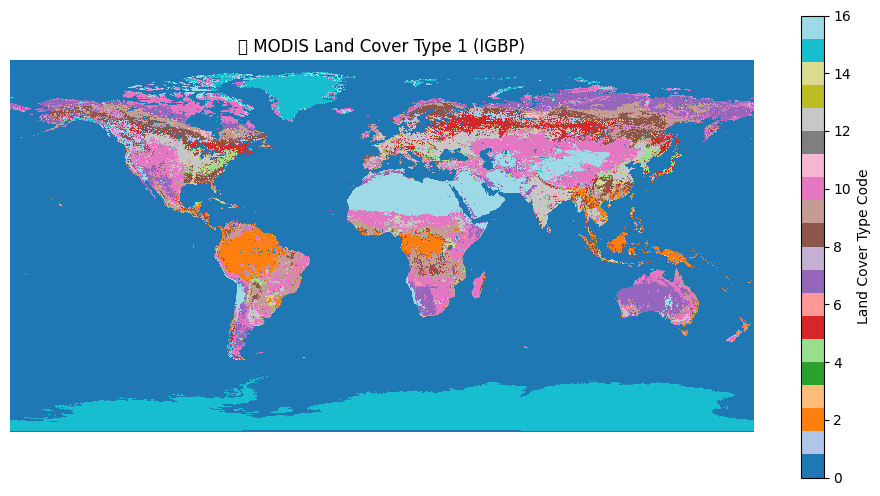

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.imshow(lc_array, cmap='tab20', interpolation='none')
plt.title("🌎 MODIS Land Cover Type 1 (IGBP)")
plt.colorbar(label="Land Cover Type Code")
plt.axis('off')
plt.show()


Install GDAL in Colab

Load LC_Type1 (land cover classification)

 Plot a Land Cover Map

The image generated is a global land cover classification map from MODIS MCD12C1 for the year 2020, using the LC_Type1 layer. Each color on this map represents a different land cover type based on the IGBP (International Geosphere-Biosphere Programme) classification.

🧾 What the colors (land cover types) mean
Here are the land cover class values (0–16) for LC_Type1:

Value	Land Cover Type
0	Water
1	Evergreen Needleleaf Forest
2	Evergreen Broadleaf Forest
3	Deciduous Needleleaf Forest
4	Deciduous Broadleaf Forest
5	Mixed Forest
6	Closed Shrublands
7	Open Shrublands
8	Woody Savannas
9	Savannas
10	Grasslands
11	Permanent Wetlands
12	Croplands
13	Urban and Built-Up
14	Cropland/Natural Vegetation Mosaic
15	Snow and Ice
16	Barren or Sparsely Vegetated
So for example:

🌲 Dark green areas = forests (values 1–5)

🟠 Orange areas = savannas/shrublands (6–9)

🟣 Purple areas = croplands and mosaics (12–14)

🔴 Red = urban zones (13)

💙 Blue = water (0)

🧊 Light cyan/white = snow/ice (15)

Land Cover Distribution (Bar Plot)

In [ ]:
!pip install earthaccess rasterio h5py geopandas matplotlib seaborn numpy pandas


Mapping Wildfire Locations with Vegetation Types

In [ ]:
!pip install geopandas


In [ ]:
!pip install rasterio h5py geopandas matplotlib


Visualize the Vegetation Map

Install the GDAL package with HDF4 support

In [ ]:

!pip install gdal



Set the GDAL environment variables

In [ ]:
!mamba install -y gdal hdf4


/bin/bash: line 1: mamba: command not found


In [ ]:
from osgeo import gdal


Load the MODIS Land Cover (LC_Type1)

using the kaggle wildfire dataset

In [ ]:


# Ensure lat/lon are numeric
wildfire['LATITUDE'] = pd.to_numeric(wildfire['LATITUDE'], errors='coerce')
wildfire['LONGITUDE'] = pd.to_numeric(wildfire['LONGITUDE'], errors='coerce')

# Drop rows with invalid coordinates
wildfire.dropna(subset=['LATITUDE', 'LONGITUDE'], inplace=True)

Mapping wildfire locations to MODIS land cover values

In [ ]:
def latlon_to_modis_pixel(lat, lon, geotransform):
    origin_x, pixel_width, _, origin_y, _, pixel_height = geotransform
    x_pixel = int((lon - origin_x) / pixel_width)
    y_pixel = int((lat - origin_y) / pixel_height)
    return x_pixel, y_pixel

# Get land cover class for each wildfire point
def get_lc_type(row):
    try:
        x, y = latlon_to_modis_pixel(row['LATITUDE'], row['LONGITUDE'], geotransform)
        return int(lc_type1[y, x])
    except:
        return np.nan

wildfire['Land_Cover_Type'] = wildfire.apply(get_lc_type, axis=1)
wildfire.dropna(subset=['Land_Cover_Type'], inplace=True)


In [ ]:
wildfire.columns

Index(['OBJECTID', 'Shape', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE',
       'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_PLUS_INCIDENT_JOIN_ID', 'ICS_209_PLUS_COMPLEX_JOIN_ID',
       'MTBS_ID', 'MTBS_FIRE_NAME', 'COMPLEX_NAME', 'FIRE_YEAR',
       'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME',
       'NWCG_CAUSE_CLASSIFICATION', 'NWCG_GENERAL_CAUSE',
       'NWCG_CAUSE_AGE_CATEGORY', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME',
       'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_DESCR',
       'STATE', 'COUNTY', 'FIPS_CODE', 'FIPS_NAME', 'Land_Cover_Type'],
      dtype='object')

In [ ]:
wildfire.head()

,OBJECTID,Shape,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,...,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Land_Cover_Type


correlation anaylsis

🌲 Dark green areas = forests (values 1–5)

🟠 Orange areas = savannas/shrublands (6–9)

🟣 Purple areas = croplands and mosaics (12–14)

🔴 Red = urban zones (13)

💙 Blue = water (0)

🧊 Light cyan/white = snow/ice (15)

7: Open Shrublands

 8: Woody savannas

9: Savannas

10: Grasslands

Land cover types 0–6 and 12–16 show smaller or fewer large fires.

Environmental Insight
This pattern is consistent with ecological understanding:

Grasses and savannas regenerate quickly and have fine fuels that ignite easily.

Forests, while they can support large fires, usually require specific conditions (heat, dryness) to burn extensively.

Wetlands and water bodies generally have lower fire occurrence, but classification errors or dry conditions might still register fires there.



Predicting if a fire is large based on vegetation and cause



In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight='balanced')


 SMOTE or class weighting?

Evaluating model with ROC/AUC or precision-recall curves?

Trying a different model like XGBoost


Forest Fire Prediction

Step 1: Data Integration
We'll integrate the MODIS land cover data, US wildfire incident data, and weather/fire behavior data by:

Spatially joining fire incident locations (LATITUDE, LONGITUDE) with the land cover data.

Temporal alignment (matching fire dates with corresponding land cover year).

Feature engineering (e.g., combining weather data with fire size).

Step 2: Data Cleaning
We'll clean the data to handle:

Missing values.

Convert categorical columns (month, day) to numerical features.

Normalize/scale continuous features (FFMC, temp, etc.).

Step 3: Feature Engineering
We'll create the following features:

Land Cover Type: Extract land cover type from MODIS data.

Fire Seasonality: Month, day, and season features (e.g., dry season, summer).

Weather/Fire Behavior: Combine weather and fire behavior (e.g., temperature, wind, humidity, FFMC).

Fire Cause: Incorporate cause of fire, if available.

Step 4: Model Development
We’ll train a model to predict:

Fire Size (regression problem).

Fire Occurrence (classification problem: fire/no-fire).

We'll use Random Forest, Gradient Boosting, or Neural Networks for the prediction.



Spatial Join with Fire Incidents

In [ ]:
# Use wildfire_df,
print(wildfire.columns)


Index(['OBJECTID', 'Shape', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE',
       'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_PLUS_INCIDENT_JOIN_ID', 'ICS_209_PLUS_COMPLEX_JOIN_ID',
       'MTBS_ID', 'MTBS_FIRE_NAME', 'COMPLEX_NAME', 'FIRE_YEAR',
       'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME',
       'NWCG_CAUSE_CLASSIFICATION', 'NWCG_GENERAL_CAUSE',
       'NWCG_CAUSE_AGE_CATEGORY', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME',
       'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_DESCR',
       'STATE', 'COUNTY', 'FIPS_CODE', 'FIPS_NAME', 'Land_Cover_Type',
       'LATITUDE_round', 'LONGITUDE_round', 'month', 'day'],
      dtype='object')


In [ ]:
print(wildfire[['LATITUDE', 'LONGITUDE']].describe())
print(wildfire[['LATITUDE', 'LONGITUDE']].isna().sum())


       LATITUDE  LONGITUDE
count       0.0        0.0
mean        NaN        NaN
std         NaN        NaN
min         NaN        NaN
25%         NaN        NaN
50%         NaN        NaN
75%         NaN        NaN
max         NaN        NaN
LATITUDE     0
LONGITUDE    0
dtype: int64


In [ ]:
# Drop rows with missing coordinates
wildfire = wildfire.dropna(subset=['LATITUDE', 'LONGITUDE'])


I'll use Geospatial libraries (geopandas, shapely) to join fire incidents with the land cover data.

In [ ]:
wildfire_df.head()

,LONGITUDE_round,LATITUDE_round,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,0,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,0,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
from shapely.geometry import Point

# Drop any rows with missing coordinates
#wildfire_df = wildfire_df.dropna(subset=['LATITUDE', 'LONGITUDE'])

# Create geometry from coordinates
geometry = [Point(xy) for xy in zip(wildfire['LONGITUDE'], wildfire['LATITUDE'])]

# Create GeoDataFrame
gdf_fire = gpd.GeoDataFrame(wildfire, geometry=geometry)

# Set CRS (if not already set)
gdf_fire.set_crs(epsg=4326, inplace=True)  # WGS84 Latitude/Longitude


,OBJECTID,Shape,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,...,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Land_Cover_Type,LATITUDE_round,LONGITUDE_round,month,day,geometry



 Feature Engineering

In [ ]:
print("Columns in wildfire_df:", wildfire_df.columns.tolist())
print("Columns in wildfire:", wildfire.columns.tolist())

Columns in wildfire_df: ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
Columns in wildfire: ['OBJECTID', 'Shape', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID', 'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT', 'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID', 'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME', 'ICS_209_PLUS_INCIDENT_JOIN_ID', 'ICS_209_PLUS_COMPLEX_JOIN_ID', 'MTBS_ID', 'MTBS_FIRE_NAME', 'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME', 'NWCG_CAUSE_CLASSIFICATION', 'NWCG_GENERAL_CAUSE', 'NWCG_CAUSE_AGE_CATEGORY', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_DESCR', 'STATE', 'COUNTY', 'FIPS_CODE', 'FIPS_NAME', 'Land_Cover_Type', 'LATITUDE_round', 'LONGITUDE_round']


In [ ]:
import pandas as pd
import numpy as np

# Convert 'month' and 'day' from numeric if necessary (you already have them as integers, so skip if numeric)
# wildfire_df['month'] = wildfire_df['month'].astype(int)
# wildfire_df['day'] = wildfire_df['day'].astype(int)

# Rename wildfire_df columns to match wildfire
wildfire_df.rename(columns={
    'X': 'LONGITUDE_round',
    'Y': 'LATITUDE_round'
}, inplace=True)

# Confirm alignment before merge
print("wildfire_df columns:", wildfire_df.columns.tolist())
print("wildfire columns:", wildfire.columns.tolist())
# Convert DISCOVERY_DATE to datetime and extract month and day
wildfire['DISCOVERY_DATE'] = pd.to_datetime(wildfire['DISCOVERY_DATE'], errors='coerce')
wildfire['month'] = wildfire['DISCOVERY_DATE'].dt.month
wildfire['day'] = wildfire['DISCOVERY_DATE'].dt.day

# Now perform the merge
merged_df = wildfire.merge(
    wildfire_df,
    on=['LONGITUDE_round', 'LATITUDE_round', 'month', 'day'],
    how='inner'
)

# Merge based on spatial and temporal fields
merged_df = wildfire.merge(wildfire_df, on=['LONGITUDE_round', 'LATITUDE_round', 'month', 'day'], how='inner')

# Example: Extract land cover from MODIS array (dummy example below — adjust indexing as needed)
# Assuming lc_array is a 2D numpy array aligned with lat/lon grid
# You may need to transform lat/lon to indices (row, col)
# Here's a placeholder:
# merged_df['land_cover'] = lc_array[merged_df['LAT_IDX'], merged_df['LON_IDX']]

# Feature engineering
merged_df['is_summer'] = merged_df['month'].isin([6, 7, 8]).astype(int)
merged_df['is_dry_season'] = merged_df['month'].isin([3, 4, 5, 9, 10, 11]).astype(int)

# View result
print(merged_df.head())


wildfire_df columns: ['LONGITUDE_round', 'LATITUDE_round', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
wildfire columns: ['OBJECTID', 'Shape', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID', 'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT', 'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID', 'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME', 'ICS_209_PLUS_INCIDENT_JOIN_ID', 'ICS_209_PLUS_COMPLEX_JOIN_ID', 'MTBS_ID', 'MTBS_FIRE_NAME', 'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME', 'NWCG_CAUSE_CLASSIFICATION', 'NWCG_GENERAL_CAUSE', 'NWCG_CAUSE_AGE_CATEGORY', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_DESCR', 'STATE', 'COUNTY', 'FIPS_CODE', 'FIPS_NAME', 'Land_Cover_Type', 'LATITUDE_round', 'LONGITUDE_round']
Empty DataFrame
Columns: [OBJECTID, Shape, FOD_ID, FPA_ID, SOURCE_SYSTEM_TYPE, SOURCE_SYST

Model Development
For predicting fire size (regression), we'll train a Random Forest Regressor

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [ ]:
# Feature selection
features = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'Land_Cover_Type', 'is_summer', 'is_dry_season']
target = 'FIRE_SIZE'

X = merged_df[features]
y = merged_df[target]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

In [ ]:
# Plot predictions vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Fire Size')
plt.ylabel('Predicted Fire Size')
plt.title('Fire Size Prediction')
plt.show()


Visualization
Visualize the predictions vs. actual fire sizes

////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [ ]:
!apt install -y libgdal-dev
!pip install geopandas rasterio fiona shapely pyproj

import numpy as np
import pandas as pd
import geopandas as gpd
import rasterio
from rasterio.plot import show
from rasterio.warp import transform
from shapely.geometry import Point
import matplotlib.pyplot as plt


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgdal-dev is already the newest version (3.6.4+dfsg-1~jammy0).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 79.7 MB/s eta 0:00:00


Full Workflow: MODIS Land Cover + Wildfire + Weather Integration

In [ ]:
import pandas as pd



# Filter and clean
wildfire = wildfire.dropna(subset=["LATITUDE", "LONGITUDE"])
wildfire = wildfire.reset_index(drop=True)
wildfire.head()


,OBJECTID,Shape,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,...,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Land_Cover_Type,LATITUDE_round,LONGITUDE_round,month,day


In [ ]:
from osgeo import gdal

# Open the HDF file with GDAL
modis_hdf = gdal.Open("/content/data/2025-05-10-4ceee3/MCD12C1.A2020001.061.2022172062638.hdf")
subdatasets = modis_hdf.GetSubDatasets()

# Print available subdatasets
for i, sds in enumerate(subdatasets):
    print(f"{i}: {sds[0]}")

# Pick the correct subdataset (adjust based on your needs)
lc_type1_path = [s[0] for s in subdatasets if "Land_Cover_Type_1_Percent" in s[0]][0]
lc_ds = gdal.Open(lc_type1_path)

# Read data as array
lc_array = lc_ds.ReadAsArray()
lc_gt = lc_ds.GetGeoTransform()
lc_proj = lc_ds.GetProjection()

print("Land cover shape:", lc_array.shape)


0: HDF4_EOS:EOS_GRID:"/content/data/2025-05-10-4ceee3/MCD12C1.A2020001.061.2022172062638.hdf":MOD12C1:Majority_Land_Cover_Type_1
1: HDF4_EOS:EOS_GRID:"/content/data/2025-05-10-4ceee3/MCD12C1.A2020001.061.2022172062638.hdf":MOD12C1:Majority_Land_Cover_Type_1_Assessment
2: HDF4_EOS:EOS_GRID:"/content/data/2025-05-10-4ceee3/MCD12C1.A2020001.061.2022172062638.hdf":MOD12C1:Land_Cover_Type_1_Percent
3: HDF4_EOS:EOS_GRID:"/content/data/2025-05-10-4ceee3/MCD12C1.A2020001.061.2022172062638.hdf":MOD12C1:Majority_Land_Cover_Type_2
4: HDF4_EOS:EOS_GRID:"/content/data/2025-05-10-4ceee3/MCD12C1.A2020001.061.2022172062638.hdf":MOD12C1:Majority_Land_Cover_Type_2_Assessment
5: HDF4_EOS:EOS_GRID:"/content/data/2025-05-10-4ceee3/MCD12C1.A2020001.061.2022172062638.hdf":MOD12C1:Land_Cover_Type_2_Percent
6: HDF4_EOS:EOS_GRID:"/content/data/2025-05-10-4ceee3/MCD12C1.A2020001.061.2022172062638.hdf":MOD12C1:Majority_Land_Cover_Type_3
7: HDF4_EOS:EOS_GRID:"/content/data/2025-05-10-4ceee3/MCD12C1.A2020001.061.20

In [ ]:
from osgeo import gdal, osr
import geopandas as gpd
from shapely.geometry import Point
import numpy as np

# Load wildfire CSV and create GeoDataFrame
geometry = [Point(xy) for xy in zip(wildfire["LONGITUDE"], wildfire["LATITUDE"])]
wildfire_gdf = gpd.GeoDataFrame(wildfire, geometry=geometry, crs="EPSG:4326")

# Open the MODIS HDF4 file with GDAL
modis_file = "/content/data/2025-05-10-4ceee3/MCD12C1.A2020001.061.2022172062638.hdf"
modis_hdf = gdal.Open(modis_file)
subdatasets = modis_hdf.GetSubDatasets()

# Select the correct subdataset path (Type 1 land cover)
lc_type1_path = [s[0] for s in subdatasets if "Majority_Land_Cover_Type_1" in s[0]][0]
lc_ds = gdal.Open(lc_type1_path)
lc_array = lc_ds.ReadAsArray()
gt = lc_ds.GetGeoTransform()
proj = lc_ds.GetProjection()

# Set up coordinate transformer: WGS84 -> MODIS projection
source = osr.SpatialReference()
source.ImportFromEPSG(4326)
target = osr.SpatialReference()
target.ImportFromWkt(proj)
transform = osr.CoordinateTransformation(source, target)

# Reproject wildfire coordinates and extract land cover values
land_cover_values = []
for point in wildfire_gdf.geometry:
    # Transform to MODIS projection
    x, y, _ = transform.TransformPoint(point.x, point.y)

    # Convert to pixel coordinates
    px = int((x - gt[0]) / gt[1])
    py = int((y - gt[3]) / gt[5])

    # Handle out-of-bounds
    if 0 <= px < lc_array.shape[1] and 0 <= py < lc_array.shape[0]:
        land_cover_values.append(int(lc_array[py, px]))
    else:
        land_cover_values.append(np.nan)

# Add land cover to GeoDataFrame
wildfire_gdf["land_cover_type"] = land_cover_values
wildfire_gdf.head()


,OBJECTID,Shape,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,...,COUNTY,FIPS_CODE,FIPS_NAME,Land_Cover_Type,LATITUDE_round,LONGITUDE_round,month,day,geometry,land_cover_type


In [ ]:
modis_igbp_classes = {
    0: "Water",
    1: "Evergreen Needleleaf Forest",
    2: "Evergreen Broadleaf Forest",
    3: "Deciduous Needleleaf Forest",
    4: "Deciduous Broadleaf Forest",
    5: "Mixed Forests",
    6: "Closed Shrublands",
    7: "Open Shrublands",
    8: "Woody Savannas",
    9: "Savannas",
    10: "Grasslands",
    11: "Permanent Wetlands",
    12: "Croplands",
    13: "Urban and Built-up",
    14: "Cropland/Natural Vegetation Mosaic",
    15: "Snow and Ice",
    16: "Barren or Sparsely Vegetated",
    254: "Unclassified",
    255: "Fill Value"
}

wildfire_gdf["land_cover_label"] = wildfire_gdf["land_cover_type"].map(modis_igbp_classes)


In [ ]:
print("wildfire_gdf columns:", wildfire_gdf.columns.tolist())
print("wildfire_df columns:", wildfire_df.columns.tolist())


wildfire_gdf columns: ['OBJECTID', 'Shape', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID', 'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT', 'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID', 'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME', 'ICS_209_PLUS_INCIDENT_JOIN_ID', 'ICS_209_PLUS_COMPLEX_JOIN_ID', 'MTBS_ID', 'MTBS_FIRE_NAME', 'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME', 'NWCG_CAUSE_CLASSIFICATION', 'NWCG_GENERAL_CAUSE', 'NWCG_CAUSE_AGE_CATEGORY', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_DESCR', 'STATE', 'COUNTY', 'FIPS_CODE', 'FIPS_NAME', 'Land_Cover_Type', 'LATITUDE_round', 'LONGITUDE_round', 'month', 'day', 'geometry', 'land_cover_type', 'land_cover_label']
wildfire_df columns: ['LONGITUDE_round', 'LATITUDE_round', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']


In [ ]:
# Mapping from month abbreviations to integers
month_map = {
    "jan": 1, "feb": 2, "mar": 3, "apr": 4,
    "may": 5, "jun": 6, "jul": 7, "aug": 8,
    "sep": 9, "oct": 10, "nov": 11, "dec": 12
}

# If your months are capitalized or mixed case, normalize them
wildfire_df["month"] = wildfire_df["month"].str.lower().map(month_map)

# Now convert day to int safely
wildfire_df["day"] = pd.to_numeric(wildfire_df["day"], errors="coerce")

# Drop rows with invalid data
wildfire_df.dropna(subset=["month", "day"], inplace=True)

# Optionally cast to int
wildfire_df["month"] = wildfire_df["month"].astype(int)
wildfire_df["day"] = wildfire_df["day"].astype(int)


In [ ]:
wildfire_gdf["DISCOVERY_DATE"] = pd.to_datetime(wildfire_gdf["DISCOVERY_DATE"], errors="coerce")
wildfire_gdf["month"] = wildfire_gdf["DISCOVERY_DATE"].dt.month
wildfire_gdf["day"] = wildfire_gdf["DISCOVERY_DATE"].dt.day


In [ ]:
wildfire_gdf.head()

,OBJECTID,Shape,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,...,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,geometry,land_cover_type,land_cover_label,month,day
0,1,b'\x00\x01\xad\x10\x00\x00\xc8\xce\n[_@^\xc0\x...,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,...,USFS,CA,63.0,6063.0,Plumas County,"POLYGON ((-120.99583 40.03694, -120.99588 40.0...",1,Evergreen Needleleaf Forest,2,2
1,2,b'\x00\x01\xad\x10\x00\x00\xc8\xe594\xe2\x19^\...,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,USFS,CA,61.0,6061.0,Placer County,"POLYGON ((-120.39444 38.93306, -120.39449 38.9...",1,Evergreen Needleleaf Forest,5,12
2,3,b'\x00\x01\xad\x10\x00\x00x{\xac \x13/^\xc0@\x...,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,STATE OR PRIVATE,CA,17.0,6017.0,El Dorado County,"POLYGON ((-120.72556 38.98417, -120.7256 38.98...",1,Evergreen Needleleaf Forest,5,31
3,4,b'\x00\x01\xad\x10\x00\x00\xc8\x13u\xd7s\xfa]\...,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,USFS,CA,3.0,6003.0,Alpine County,"POLYGON ((-119.90333 38.55917, -119.90338 38.5...",9,Savannas,6,28
4,5,b'\x00\x01\xad\x10\x00\x00\xd0\x11y\xf8\xb6\xf...,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,USFS,CA,3.0,6003.0,Alpine County,"POLYGON ((-119.92306 38.55917, -119.9231 38.55...",9,Savannas,6,28


Merge Weather/Behavior Dataset (wildfire_df) with wildfire_gdf Spatially + Temporally
Since we don’t have a direct unique identifier, we’ll:

Round LAT/LON in wildfire_gdf

Use month and day extracted from DISCOVERY_DATE



In [ ]:
# Ensure datetime conversion
wildfire_gdf["DISCOVERY_DATE"] = pd.to_datetime(wildfire_gdf["DISCOVERY_DATE"], errors='coerce')
wildfire_gdf = wildfire_gdf.dropna(subset=["DISCOVERY_DATE"])

# Extract month and day
wildfire_gdf["month"] = wildfire_gdf["DISCOVERY_DATE"].dt.month
wildfire_gdf["day"] = wildfire_gdf["DISCOVERY_DATE"].dt.day

# Round coordinates for spatial match
wildfire_gdf["lat_round"] = wildfire_gdf["LATITUDE"].round(2)
wildfire_gdf["lon_round"] = wildfire_gdf["LONGITUDE"].round(2)

wildfire_df["X"] = wildfire_df["X"].round(2)
wildfire_df["Y"] = wildfire_df["Y"].round(2)

# Convert 'month' and 'day' in wildfire_df to integers (if not already)
wildfire_df["month"] = wildfire_df["month"].astype(int)
wildfire_df["day"] = wildfire_df["day"].astype(int)

# Merge on lat, lon, month, and day
joined_gdf = pd.merge(
    wildfire_gdf,
    wildfire_df,
    left_on=["lat_round", "lon_round", "month", "day"],
    right_on=["X", "Y", "month", "day"],
    how="inner"
)

print("Merged shape:", joined_gdf.shape)
joined_gdf[["FIRE_NAME", "month", "day", "temp", "RH", "wind", "rain", "area", "FIRE_SIZE_CLASS", "land_cover_label"]].head()


Merged shape: (0, 58)


,FIRE_NAME,month,day,temp,RH,wind,rain,area,FIRE_SIZE_CLASS,land_cover_label


In [ ]:
print("wildfire_gdf coords:")
print(wildfire_gdf[["lat_round", "lon_round"]].drop_duplicates().head())

print("\nwildfire_df coords:")
print(wildfire_df[["X", "Y"]].drop_duplicates().head())


wildfire_gdf coords:
   lat_round  lon_round
0      40.04    -121.01
1      38.93    -120.40
2      38.98    -120.74
3      38.56    -119.91
4      38.56    -119.93

wildfire_df coords:
Empty DataFrame
Columns: [X, Y]
Index: []


In [ ]:
print(wildfire_df.shape)
print(wildfire_df[["area", "temp", "RH", "wind", "rain"]].dropna().head())


(517, 13)
   area  temp  RH  wind  rain
0   0.0   8.2  51   6.7   0.0
1   0.0  18.0  33   0.9   0.0
2   0.0  14.6  33   1.3   0.0
3   0.0   8.3  97   4.0   0.2
4   0.0  11.4  99   1.8   0.0


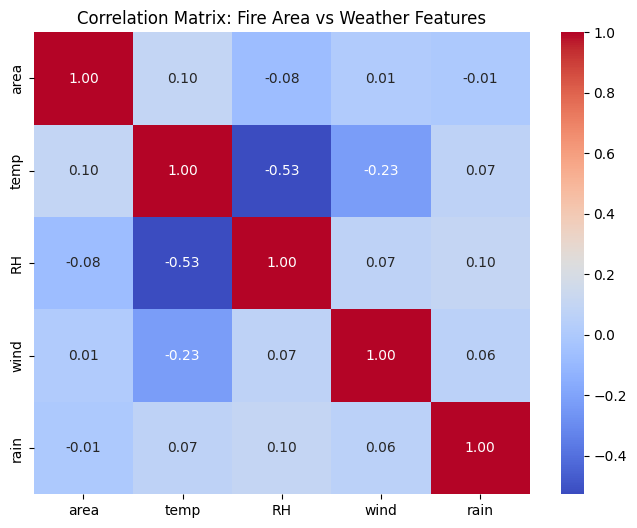

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlations
corr = wildfire_df[["area", "temp", "RH", "wind", "rain"]].corr()

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: Fire Area vs Weather Features")
plt.show()


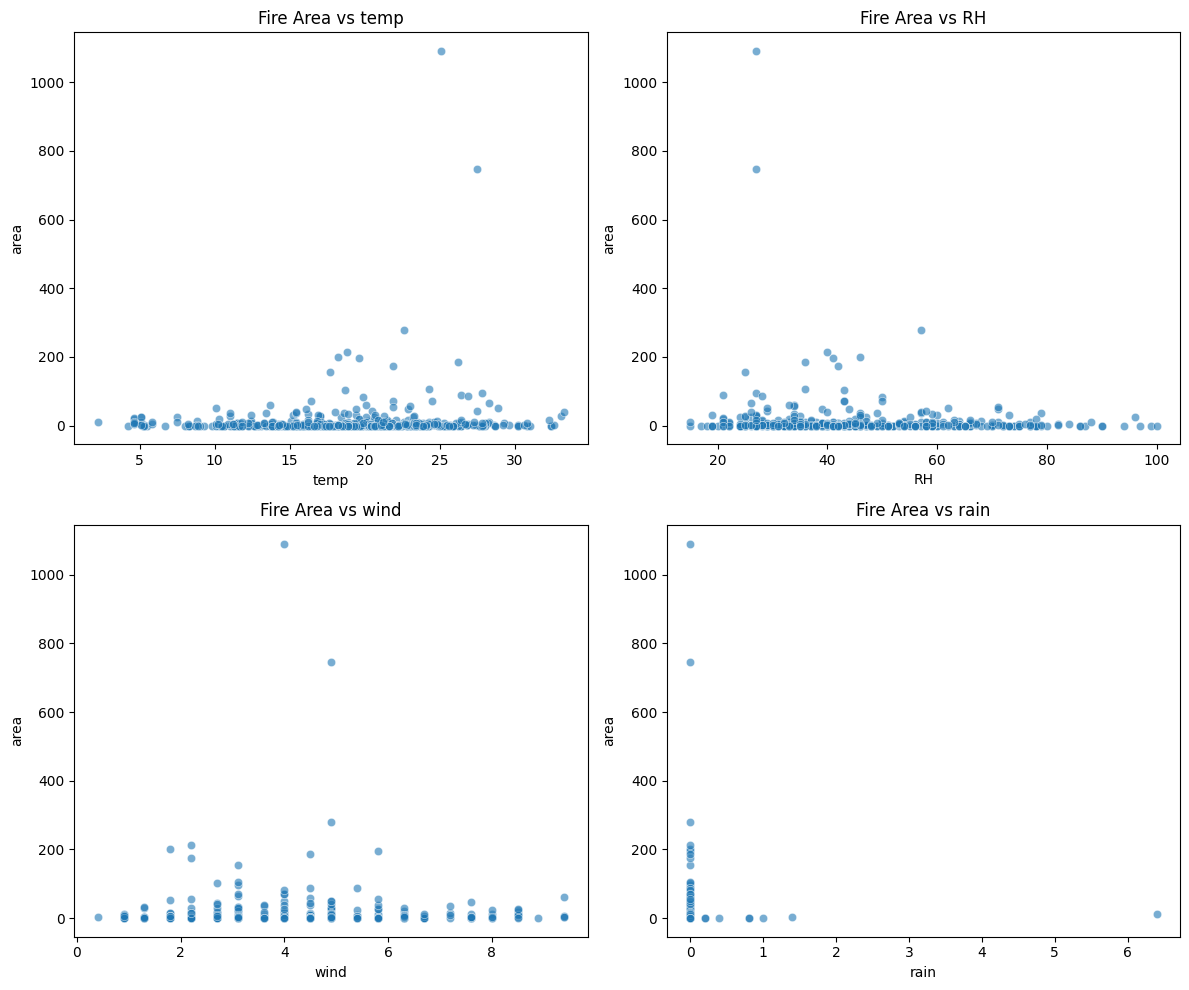

In [ ]:
features = ["temp", "RH", "wind", "rain"]

plt.figure(figsize=(12, 10))
for i, feat in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=wildfire_df, x=feat, y="area", alpha=0.6)
    plt.title(f"Fire Area vs {feat}")
plt.tight_layout()
plt.show()


Convert area to Class (for Classification)

In [ ]:
def area_to_class(area):
    if area == 0:
        return "A"  # No burn
    elif area <= 10:
        return "B"  # Small
    elif area <= 100:
        return "C"  # Medium
    else:
        return "D"  # Large

wildfire_df["FIRE_SIZE_CLASS"] = wildfire_df["area"].apply(area_to_class)


Train a Classifier (Random Forest)

Classification Report:
              precision    recall  f1-score   support

           A       0.60      0.60      0.60        77
           B       0.37      0.45      0.41        51
           C       0.25      0.15      0.19        26
           D       0.00      0.00      0.00         2

    accuracy                           0.47       156
   macro avg       0.30      0.30      0.30       156
weighted avg       0.46      0.47      0.46       156



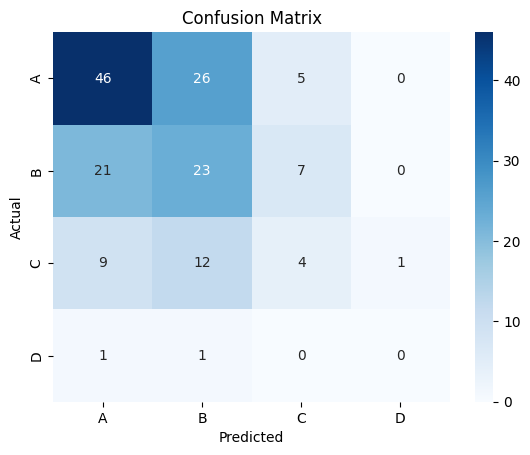

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Features and label
X = wildfire_df[["temp", "RH", "wind", "rain"]]
y = wildfire_df["FIRE_SIZE_CLASS"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


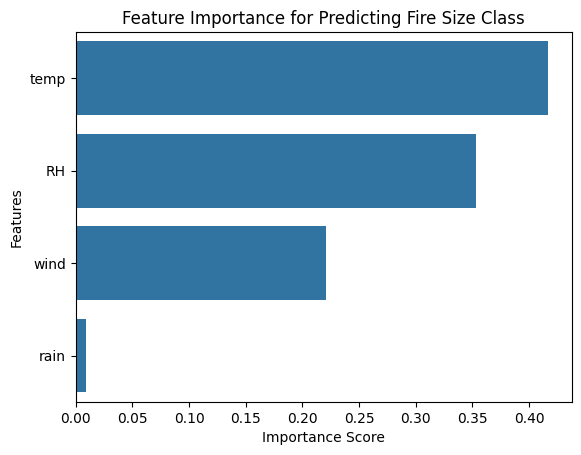

In [ ]:
importances = clf.feature_importances_
feat_names = X.columns

sns.barplot(x=importances, y=feat_names)
plt.title("Feature Importance for Predicting Fire Size Class")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


Classification Report:
              precision    recall  f1-score   support

           A       0.60      0.60      0.60        77
           B       0.37      0.45      0.41        51
           C       0.25      0.15      0.19        26
           D       0.00      0.00      0.00         2

    accuracy                           0.47       156
   macro avg       0.30      0.30      0.30       156
weighted avg       0.46      0.47      0.46       156



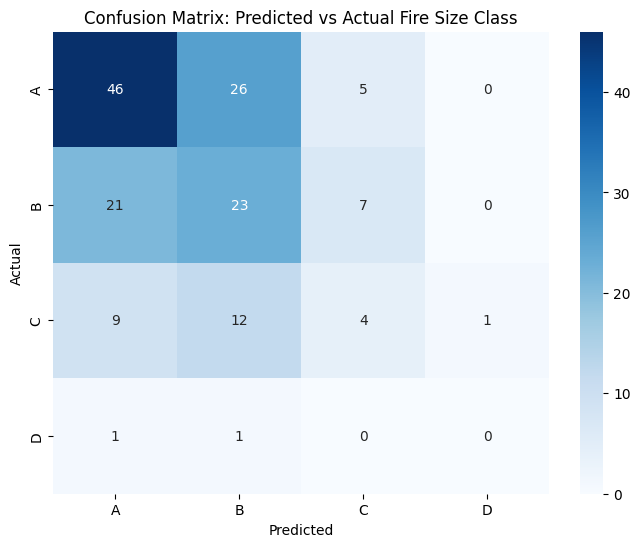

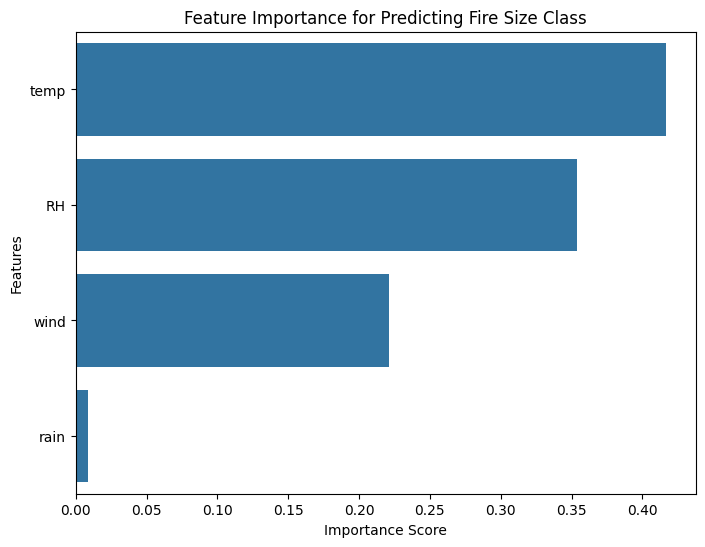

Predicted Fire Size Class: B


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load and preprocess data (use wildfire_df as your input)
def area_to_class(area):
    if area == 0:
        return "A"  # No burn
    elif area <= 10:
        return "B"  # Small
    elif area <= 100:
        return "C"  # Medium
    else:
        return "D"  # Large

# Applying the class to the area column
wildfire_df["FIRE_SIZE_CLASS"] = wildfire_df["area"].apply(area_to_class)

# Features and label
X = wildfire_df[["temp", "RH", "wind", "rain"]]  # Weather features
y = wildfire_df["FIRE_SIZE_CLASS"]  # Class target

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Initialize and train a RandomForestClassifier model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Step 4: Predict the fire size class on the test set
y_pred = clf.predict(X_test)

# Step 5: Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: Predicted vs Actual Fire Size Class")
plt.show()

# Step 6: Feature Importance Plot
importances = clf.feature_importances_
feat_names = X.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=feat_names)
plt.title("Feature Importance for Predicting Fire Size Class")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Step 7: Make a prediction for new data
new_data = pd.DataFrame({
    "temp": [25],  # Example temperature
    "RH": [40],    # Example Relative Humidity
    "wind": [10],  # Example Wind Speed
    "rain": [0]    # Example Rain
})

# Predict fire size class for the new data
new_prediction = clf.predict(new_data)
print(f"Predicted Fire Size Class: {new_prediction[0]}")


pproach to Predict Future Wildfires
1. Data Integration and Preprocessing:
Geospatial Data Alignment:

The MODIS Land Cover Dataset and the US Wildfire Incident Dataset must be aligned based on their geographical locations (latitude and longitude). This can be done by using spatial joins, aggregating incidents in specific regions or by matching coordinates.

Temporal Alignment:

Align the Fire Weather and Behavior Dataset based on time. If you have a specific date range for the weather data, you can match it with the fire incidents and align it by month or season.

2. Feature Engineering:
Land Cover Features:

Add a feature for each land cover type to understand how different vegetation types contribute to wildfire risk.

Weather Features:

Include features like temperature, relative humidity (RH), wind speed, and precipitation, which are key factors influencing fire spread.

Temporal Features:

Add seasonal or time-related features (e.g., month, season) to capture the impact of time of year on wildfire occurrence.

3. Predictive Model Design:
Target Variables: You can predict the following:

Fire Occurrence (Binary): Whether a fire occurs in a given time period or region (classification problem).

Fire Size: Predict the size or class of the fire (classification or regression problem).

Fire Spread: Predict the spread or area affected by the fire (regression problem).

Model Choices:

Random Forest Classifier: For predicting fire occurrence or fire size classes.

Gradient Boosting Models (e.g., XGBoost, LightGBM): These models perform well for both classification and regression tasks.

Neural Networks: A deep learning approach could also be used, especially if you want to account for complex interactions between weather, land cover, and fire behavior.

Time-Series Models: For predicting future wildfires based on historical trends and seasonal patterns, models like ARIMA or LSTM (Long Short-Term Memory) networks could be useful.

4. Model Training and Validation:
Split the data into training and testing sets.

Train the model on the historical data and evaluate its performance using metrics such as accuracy, precision, recall, and F1-score (for classification) or R-squared (for regression).

5. Prediction and Deployment:
Once the model is trained and validated, it can predict future wildfires based on current weather conditions, land cover types, and past wildfire data.

The model can be deployed for real-time predictions using live weather data and satellite imagery.

🔹 Example: Predicting Future Wildfires
Here's a conceptual framework for building such a model using the three datasets:

Merge the Datasets:

Spatial Merge: Join the land cover data and wildfire incidents using geographic coordinates.

Temporal Merge: Align the fire weather data with the wildfire incident data using dates.

Feature Engineering: Create new features such as:

Land cover type (e.g., forest, grassland, etc.).

Weather conditions (e.g., temperature, humidity, wind speed).

Time features (e.g., month, season).

Training the Model: Train a model like Random Forest or Gradient Boosting to predict either the fire occurrence (binary classification) or fire size (regression/classification).

In [ ]:
print(wildfire_df.columns)


Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area', 'FIRE_SIZE_CLASS'],
      dtype='object')


In [ ]:
# Assuming wildfire_gdf has 'land_cover_label', and 'X', 'Y' are the coordinates in wildfire_df
wildfire_df['lat_round'] = wildfire_df['Y'].round(2)
wildfire_df['lon_round'] = wildfire_df['X'].round(2)

# Merge based on rounded coordinates
merged_df = pd.merge(wildfire_df, wildfire_gdf[['lat_round', 'lon_round', 'land_cover_label']],
                      left_on=['lat_round', 'lon_round'],
                      right_on=['lat_round', 'lon_round'],
                      how='left')

# Now, 'merged_df' should have the 'land_cover_label' column
print(merged_df.columns)


<ipython-input-35-3093f8bfdb16>:6: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(wildfire_df, wildfire_gdf[['lat_round', 'lon_round', 'land_cover_label']],


Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area', 'FIRE_SIZE_CLASS', 'lat_round', 'lon_round',
       'land_cover_label'],
      dtype='object')


In [ ]:
print(merged_df[['X', 'Y', 'land_cover_label', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area', 'FIRE_SIZE_CLASS']].head())


   X  Y land_cover_label month  day  FFMC   DMC     DC  ISI  temp  RH  wind  \
0  7  5              NaN   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   
1  7  4              NaN   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   
2  7  4              NaN   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   
3  8  6              NaN   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   
4  8  6              NaN   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   

   rain  area FIRE_SIZE_CLASS  
0   0.0   0.0               A  
1   0.0   0.0               A  
2   0.0   0.0               A  
3   0.2   0.0               A  
4   0.0   0.0               A  


In [ ]:
merged_df.rename(columns={'land_cover_label': 'land_cover'}, inplace=True)


In [ ]:
# Encode categorical columns
merged_df['month'] = merged_df['month'].map({'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12})
merged_df['day'] = merged_df['day'].map({'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7})
merged_df['FIRE_SIZE_CLASS'] = merged_df['FIRE_SIZE_CLASS'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5})


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           A       0.60      0.60      0.60        77
           B       0.37      0.45      0.41        51
           C       0.25      0.15      0.19        26
           D       0.00      0.00      0.00         2

    accuracy                           0.47       156
   macro avg       0.30      0.30      0.30       156
weighted avg       0.46      0.47      0.46       156



In [ ]:
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}


: Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode the target variable (FIRE_SIZE_CLASS) into numeric labels
y_encoded = label_encoder.fit_transform(wildfire_df['FIRE_SIZE_CLASS'])

# Now split the data (you can use y_encoded instead of the original y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)


 Train XGBoost Model

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Initialize XGBoost model
xgb_model = XGBClassifier(eval_metric='mlogloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

           A       0.51      0.57      0.54        77
           B       0.27      0.25      0.26        51
           C       0.14      0.12      0.12        26
           D       0.00      0.00      0.00         2

    accuracy                           0.38       156
   macro avg       0.23      0.24      0.23       156
weighted avg       0.36      0.38      0.37       156



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Decode the predictions back to original labels
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Print the decoded predictions
print(y_pred_decoded)


['A' 'A' 'A' 'C' 'A' 'A' 'B' 'A' 'B' 'C' 'A' 'A' 'A' 'A' 'B' 'C' 'C' 'A'
 'A' 'B' 'A' 'C' 'B' 'A' 'C' 'B' 'A' 'B' 'A' 'A' 'C' 'A' 'B' 'B' 'A' 'A'
 'A' 'B' 'A' 'A' 'B' 'A' 'A' 'A' 'A' 'A' 'B' 'B' 'A' 'B' 'C' 'A' 'A' 'A'
 'A' 'A' 'A' 'B' 'A' 'B' 'B' 'A' 'B' 'A' 'B' 'C' 'A' 'A' 'A' 'A' 'A' 'A'
 'C' 'B' 'A' 'B' 'A' 'B' 'B' 'B' 'C' 'A' 'A' 'A' 'A' 'A' 'B' 'B' 'B' 'B'
 'A' 'B' 'A' 'A' 'A' 'B' 'A' 'B' 'A' 'A' 'B' 'C' 'C' 'B' 'A' 'A' 'C' 'A'
 'B' 'A' 'A' 'C' 'A' 'B' 'C' 'A' 'C' 'A' 'B' 'B' 'B' 'B' 'A' 'A' 'A' 'B'
 'C' 'A' 'A' 'B' 'B' 'A' 'A' 'B' 'C' 'B' 'C' 'A' 'B' 'C' 'A' 'A' 'A' 'A'
 'B' 'A' 'A' 'A' 'A' 'B' 'C' 'A' 'B' 'A' 'A' 'A']


Time-Series Forecasting with ARIMA:
Steps for ARIMA:
Prepare the data: Organize the dataset into a time-series format.

Stationarity Check: ARIMA requires the data to be stationary. Perform differencing or transformations to make the series stationary if necessary.

Modeling: Fit the ARIMA model and make predictions.

Evaluation: Evaluate the performance using appropriate metrics like RMSE or MAE

In [ ]:
wildfire_df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,FIRE_SIZE_CLASS,lat_round,lon_round
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,A,5,7
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,A,4,7
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,A,4,7
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,A,6,8
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,A,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,B,3,4
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,C,4,2
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,C,4,7
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,A,4,1


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

RMSE: 11.137946615014366


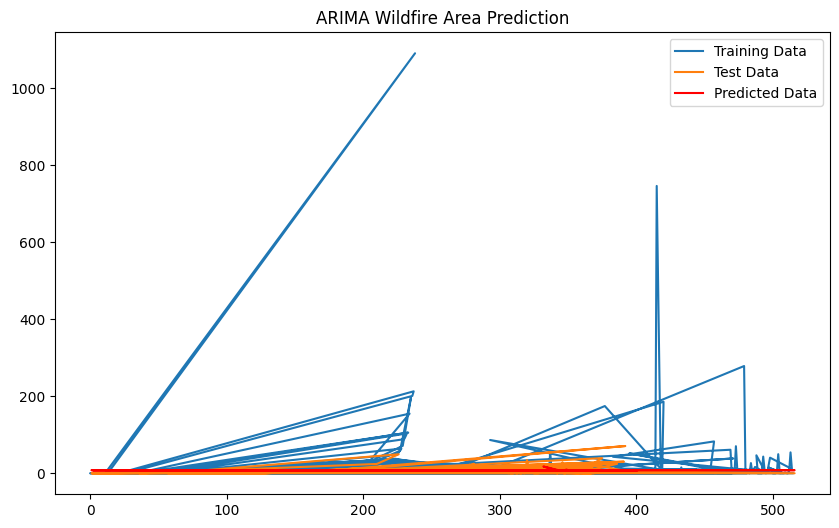

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming wildfire_df is already loaded and contains the required columns

# Mapping months to numerical values
month_map = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

# Convert month name to numeric value
wildfire_df['month_num'] = wildfire_df['month'].map(month_map)

# Combine 'month' and 'day' to create a Date
wildfire_df['date'] = wildfire_df.apply(lambda row: f'{row["month_num"]}/2020/{row["day"]}', axis=1)

# Convert to datetime format
wildfire_df['date'] = pd.to_datetime(wildfire_df['date'], format='%m/%Y/%a')

# Now you can use the 'date' column for time-series analysis
# Sort by the new 'date' column
wildfire_df = wildfire_df.sort_values(by='date')

# Use 'area' column for time-series forecasting
area_series = wildfire_df['area']

# Train-Test Split (80-20)
train_size = int(len(area_series) * 0.8)
train, test = area_series[:train_size], area_series[train_size:]

# ARIMA Model: Let's assume p=5, d=1, q=0 for simplicity
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# Make predictions
forecast = model_fit.forecast(steps=len(test))
forecast_index = test.index

# Evaluate Model
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"RMSE: {rmse}")

# Plot Results
plt.figure(figsize=(10,6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(forecast_index, forecast, label='Predicted Data', color='red')
plt.legend()
plt.title("ARIMA Wildfire Area Prediction")
plt.show()


Extreme Values in Training: The training data includes some large wildfire events that might be outliers or seasonal spikes. These can impact ARIMA model performance if not handled (e.g., by transformation or differencing).

Smooth Predictions: The predicted data appears to track the test data well, but it seems much smoother. This is typical for ARIMA, which models linear trends and struggles with sudden spikes unless explicitly included via seasonal components.

Seasonal ARIMA (SARIMA) could be more appropriate if fire seasonality (e.g., summer spikes)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0053 - val_loss: 1.7258e-04
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0043 - val_loss: 2.6422e-04
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0031 - val_loss: 1.1017e-04
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0023 - val_loss: 1.6183e-04
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0065 - val_loss: 1.1501e-04
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0020 - val_loss: 1.3894e-04
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0025 - val_loss: 1.9036e-04
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0085 - val_loss: 1.0440e-04
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0019 - val_loss: 1.6387e-04
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0038 - val_loss: 1.4832e-04
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


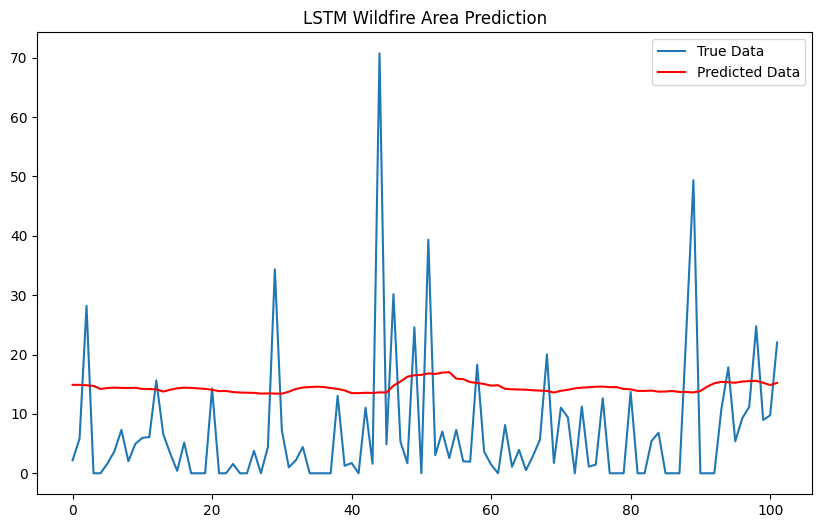

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Rescale the 'area' data to range between 0 and 1 for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_area = scaler.fit_transform(wildfire_df['area'].values.reshape(-1, 1))

# Prepare the data for LSTM by creating sequences (X, y)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define sequence length (number of previous time steps to use for prediction)
seq_length = 10  # You can change this based on the data and desired prediction horizon

# Create sequences for LSTM
X, y = create_sequences(scaled_area, seq_length)

# Split data into train and test sets (80-20)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(seq_length, 1)))
model.add(Dense(units=1))

# Compile and fit the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform predictions and actual values to original scale
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot Results
plt.figure(figsize=(10,6))
plt.plot(y_test_rescaled, label='True Data')
plt.plot(y_pred_rescaled, label='Predicted Data', color='red')
plt.legend()
plt.title("LSTM Wildfire Area Prediction")
plt.show()


Wildfire Prediction using CNNs or RNNs (Deep Learning with Satellite/Weather Data):

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# Correct the import statement for ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Example: assuming you have a dataset of satellite images (wildfire images)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Note: The following lines assume you have directories named 'train_images' and 'test_images'
# with subdirectories for each class (e.g., 'train_images/A', 'train_images/B', etc.)
# These directories and their content are not provided, so this part might fail if they don't exist.
try:
    train_generator = train_datagen.flow_from_directory('train_images/', target_size=(64, 64), batch_size=32, class_mode='categorical')
    test_generator = test_datagen.flow_from_directory('test_images/', target_size=(64, 64), batch_size=32, class_mode='categorical')

    # Build the CNN model
    cnn_model = Sequential()
    cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
    cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(128, activation='relu'))
    cnn_model.add(Dense(4, activation='softmax'))  # Assuming 4 classes: A, B, C, D

    cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    # Note: This will only run if train_generator and test_generator are successfully created
    cnn_model.fit(train_generator, epochs=10, validation_data=test_generator)

    # Evaluate on test data
    cnn_model.evaluate(test_generator)

except FileNotFoundError:
    print("Error: 'train_images/' or 'test_images/' directories not found.")
    print("Please ensure you have created these directories and populated them with images organized by class.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Error: 'train_images/' or 'test_images/' directories not found.
Please ensure you have created these directories and populated them with images organized by class.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Step 1: Encode categorical variables
df = wildfire_df.copy()

# Encode 'month' and 'day' as numeric values
df['month'] = LabelEncoder().fit_transform(df['month'])
df['day'] = LabelEncoder().fit_transform(df['day'])
df['FIRE_SIZE_CLASS'] = LabelEncoder().fit_transform(df['FIRE_SIZE_CLASS'])

# Drop any non-numeric or redundant columns (e.g., lat_round/lon_round if not needed)
X = df.drop(['area'], axis=1)
y = df['area']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 2: Define DNN model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=16, verbose=0)

# Evaluate on test set
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MAE: {test_mae:.2f}")

# Step 3: Plot learning curves
plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('DNN Learning Curve')
plt.grid(True)
plt.show()

# Step 4: Predict and compare
y_pred = model.predict(X_test).flatten()

# Scatter plot of true vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('True Area Burned')
plt.ylabel('Predicted Area Burned')
plt.title('DNN Predictions vs Actual Values')
plt.grid(True)
plt.show()


Model Selection: ConvLSTM
ConvLSTM models are adept at handling spatiotemporal data, making them suitable for wildfire prediction tasks. They combine convolutional layers (for spatial feature extraction) with LSTM layers (for temporal sequence modeling).



In [ ]:
#Load and Clean Wildfire Data

from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

file_path = "/content/drive/MyDrive/forestfires.csv"
wildfire_df = pd.read_csv(file_path)
print(wildfire_df.head())
wildfire_df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   IS

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler



# Encode categorical variables
wildfire_df['month'] = LabelEncoder().fit_transform(wildfire_df['month'])
wildfire_df['day'] = LabelEncoder().fit_transform(wildfire_df['day'])

# Normalize features
features = ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
scaler = MinMaxScaler()
wildfire_df[features] = scaler.fit_transform(wildfire_df[features])

# Normalize target variable
wildfire_df['area'] = np.log1p(wildfire_df['area'])  # Log transformation to handle skewness


sequence creation

In [ ]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, -1])  # Assuming 'area' is the last column
    return np.array(X), np.array(y)

# Combine features and target
data = wildfire_df[features + ['area']].values
seq_length = 10
X, y = create_sequences(data, seq_length)


 Reshape for ConvLSTM
ConvLSTM expects input in the shape: (samples, time_steps, rows, cols, channels). Since our data is tabular, we'll reshape accordingly.

In [ ]:
# Reshape to (samples, time_steps, rows, cols, channels)
# Here, rows=1, cols=number of features, channels=1
X = X.reshape((X.shape[0], X.shape[1], 1, X.shape[2], 1))


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, Flatten, Dense

model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(1, 3), activation='relu',
                     input_shape=(seq_length, 1, X.shape[3], 1)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))  # Output layer for regression

model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


model training

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16,
                    validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 3.0523 - val_loss: 1.3519
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 1.4172 - val_loss: 1.2407
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 1.5347 - val_loss: 1.1701
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 1.3506 - val_loss: 1.1429
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 1.0775 - val_loss: 1.1524
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 1.0364 - val_loss: 1.2512
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.9711 - val_loss: 1.1796
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 1.1077 - val_loss: 1.2230
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 1.2669 - val_loss: 1.1741
Epoch 10/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1.0921 - val_loss: 1.1970
Epoch 11/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.9453 - val_loss: 1.2009
Epoch 12/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1.1

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


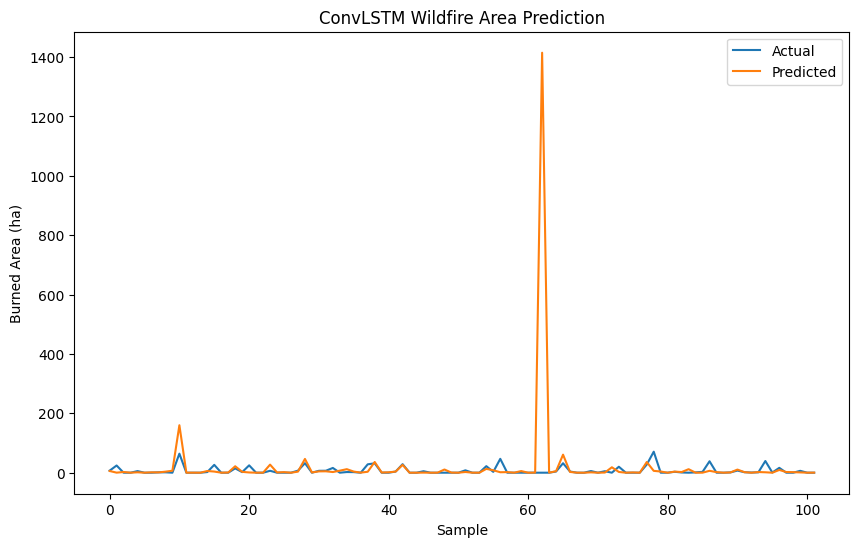

In [ ]:
#evalution
import matplotlib.pyplot as plt

# Predict
y_pred = model.predict(X_test)

# Inverse log transformation
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(y_test_exp, label='Actual')
plt.plot(y_pred_exp, label='Predicted')
plt.title('ConvLSTM Wildfire Area Prediction')
plt.xlabel('Sample')
plt.ylabel('Burned Area (ha)')
plt.legend()
plt.show()


Major Outliers: There is a large prediction spike around sample ~63 where the predicted burned area drastically overshoots the actual.

Overall Trend: In most places, the ConvLSTM model is relatively close to the actual values, which are generally small.

Issue: The model overestimates rare large fires, which is likely due to:

Imbalanced target distribution (most fires are small; few are large).

Sensitivity to outliers.

Inadequate generalization for rare, high-magnitude cases

In [ ]:
#Performance Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test_exp, y_pred_exp)
mae = mean_absolute_error(y_test_exp, y_pred_exp)
print(f'MSE: {mse:.2f}, MAE: {mae:.2f}')


MSE: 19849.83, MAE: 20.37


Step-by-Step TCN Model in TensorFlow


In [ ]:
pip install keras-tcn

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 4.4187 - mae: 1.2386 - val_loss: 0.1366 - val_mae: 0.3049
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2574 - mae: 0.2883 - val_loss: 0.1099 - val_mae: 0.2480
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1265 - mae: 0.2140 - val_loss: 0.1154 - val_mae: 0.2879
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1124 - mae: 0.2031 - val_loss: 0.0992 - val_mae: 0.2255
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0771 - mae: 0.1738 - val_loss: 0.0815 - val_mae: 0.2302
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0544 - mae: 0.1467 - val_loss: 0.0779 - val_mae: 0.2030
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0416 - mae: 0.1296 - val_loss: 0.0725 - val_mae: 0.2016
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0599 - mae: 0.1393 - val_loss: 0.0695 - val_mae: 0.1945
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0402 - mae: 0.

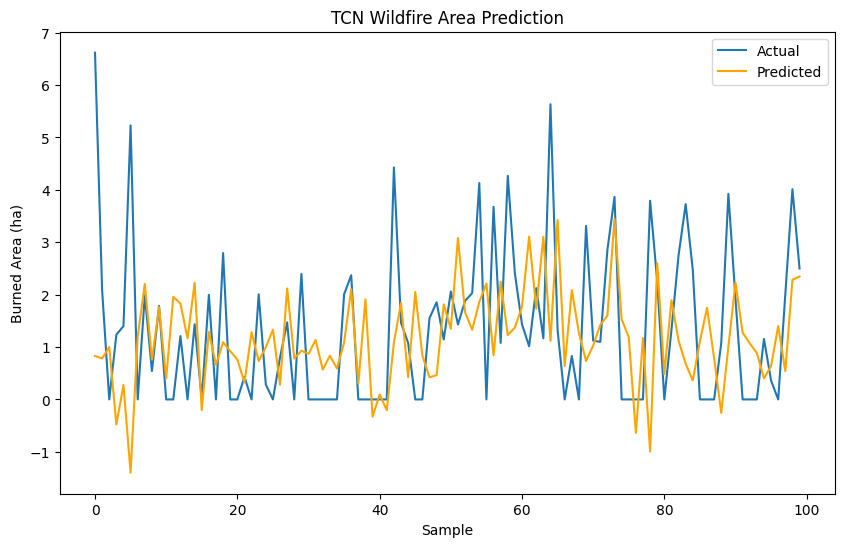

TCN MSE: 2.83, MAE: 1.25


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Input
from keras.models import Model
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tcn import TCN

# Rescale area
scaler = MinMaxScaler()
scaled_area = scaler.fit_transform(wildfire_df['area'].values.reshape(-1, 1))

# Sequence preparation
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X, y = create_sequences(scaled_area, seq_length)

# Train-test split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Expand dimensions for TCN input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build TCN model
model = Sequential()
model.add(TCN(input_shape=(seq_length, 1), nb_filters=64, kernel_size=3, dilations=[1, 2, 4, 8], dropout_rate=0.1))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predict and inverse scale
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled[:100], label='Actual')
plt.plot(y_pred_rescaled[:100], label='Predicted', color='orange')
plt.legend()
plt.title('TCN Wildfire Area Prediction')
plt.xlabel('Sample')
plt.ylabel('Burned Area (ha)')
plt.show()

# Evaluate
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
print(f"TCN MSE: {mse:.2f}, MAE: {mae:.2f}")


ARIMA is great for simple time-series forecasting when the dataset follows a relatively predictable pattern.

LSTM is better for capturing long-term dependencies in sequential data, and it performs well when there's complex, nonlinear behavior over time.

CNNs and RNNs are better for image data (satellite imagery) or complex time-series data with additional features.

////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [ ]:
pip install pandas numpy geopandas rasterio h5py scikit-learn tensorflow keras matplotlib


 Load and Clean Wildfire Data

In [ ]:
 #Load and Clean Wildfire Data

from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

file_path = "/content/drive/MyDrive/forestfires.csv"
wildfire_df = pd.read_csv(file_path)
print(wildfire_df.head())
wildfire_df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   IS

Handle 'month' and 'day' columns:

If the 'month' column contains string abbreviations (e.g., 'Jan', 'Feb'), map them to integers:

In [ ]:
month_map = {
    "jan": 1, "feb": 2, "mar": 3, "apr": 4,
    "may": 5, "jun": 6, "jul": 7, "aug": 8,
    "sep": 9, "oct": 10, "nov": 11, "dec": 12
}

wildfire_df['month'] = wildfire_df['month'].astype(str).str.lower().map(month_map)


Convert 'day' to numeric, coercing errors to NaN:

In [ ]:
wildfire_df['day'] = pd.to_numeric(wildfire_df['day'], errors='coerce')


Drop rows with invalid 'month' or 'day' values:

In [ ]:
wildfire_df.dropna(subset=['month', 'day'], inplace=True)


Cast 'month' and 'day' to integers:

In [ ]:
wildfire_df['month'] = wildfire_df['month'].astype(int)
wildfire_df['day'] = wildfire_df['day'].astype(int)


Integrate MODIS Land Cover Data
Note: Reading HDF4 files with rasterio can be problematic. It's recommended to use the gdal library for this purpose.

Read MODIS HDF4 File

In [ ]:
from osgeo import gdal

modis_file = '/content/data/2025-05-10-4ceee3/MCD12C1.A2020001.061.2022172062638.hdf'  # this is my actual file path from above
modis_dataset = gdal.Open(modis_file)
subdatasets = modis_dataset.GetSubDatasets()


In [ ]:
#Identify and Open the Desired Subdataset:

#For example, to access 'Land_Cover_Type_1_Percent':

In [ ]:
lc_type1_percent_path = [s[0] for s in subdatasets if 'Land_Cover_Type_1_Percent' in s[0]][0]
lc_ds = gdal.Open(lc_type1_percent_path)


read the data in array

In [ ]:
lc_array = lc_ds.ReadAsArray()


In [ ]:
#extract geotransform and projection
lc_gt = lc_ds.GetGeoTransform()
lc_proj = lc_ds.GetProjection()


Map Wildfire Locations to Land Cover Data:

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Create GeoDataFrame from wildfire data
geometry = [Point(xy) for xy in zip(wildfire_df["LONGITUDE"], wildfire_df["LATITUDE"])]
wildfire_gdf = gpd.GeoDataFrame(wildfire_df, geometry=geometry, crs="EPSG:4326")

# Reproject to match MODIS data CRS
wildfire_gdf = wildfire_gdf.to_crs(lc_proj)

# Calculate pixel indices
def map_coordinates_to_indices(x, y, gt):
    col = int((x - gt[0]) / gt[1])
    row = int((y - gt[3]) / gt[5])
    return row, col

# Extract land cover values
land_cover_values = []
for geom in wildfire_gdf.geometry:
    row, col = map_coordinates_to_indices(geom.x, geom.y, lc_gt)
    if 0 <= row < lc_array.shape[0] and 0 <= col < lc_array.shape[1]:
        land_cover_values.append(lc_array[row, col])
    else:
        land_cover_values.append(None)

wildfire_gdf['land_cover_type'] = land_cover_values


KeyError: 'LONGITUDE'

Prepare Data for DNN Model
Encode Categorical Variables:

In [ ]:
from sklearn.preprocessing import LabelEncoder

df = wildfire_gdf.copy()
df['FIRE_SIZE_CLASS'] = LabelEncoder().fit_transform(df['FIRE_SIZE_CLASS'])


In [ ]:
#Define Features and Target:
X = df.drop(['area', 'geometry'], axis=1)  # Exclude non-numeric columns
y = df['area']


In [ ]:
#standarize feature
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
#training and testing test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
#prepare data for CNA MODEL
train_images/
    class_A/
    class_B/
    class_C/
    class_D/
test_images/
    class_A/
    class_B/
    class_C/
    class_D/


In [ ]:
#SETUP MAGE GENERATION
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'train_images/',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    'test_images/',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)


In [ ]:
#RNN
import numpy as np

# Assuming 'X_time_series' is your time-series feature array
# and 'y_time_series' is the corresponding target array

# Reshape X to be 3D [samples, timesteps, features]
X_rnn = np.reshape(X_time_series, (X_time_series.shape[0], X_time_series.shape[1], X_time_series.shape[2]))

# Split into training and testing sets
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_rnn, y_time_series, test_size=0.2, random_state=42)
